**Trabalho de Deep Learning**



In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
link = "https://raw.githubusercontent.com/rmicheldev/datasets/main/MoviesOnStreamingPlatforms_updated.csv"

# Carrega o arquivo do github
rawDf = pd.read_csv(link)

In [3]:
rawDf.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [4]:
#Mostra os tipos de dados
rawDf.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

* Unnamed: 0           int64   Numerical
* ID                   int64   Numerical 
* Title               object   ????
* Year                 int64   Numerical 
* Age                 object   Categorical
* IMDb               float64   Numerical
* Rotten Tomatoes     object   Numerical
* Netflix              int64   Categorical
* Hulu                 int64   Categorical
* Prime Video          int64   Categorical
* Disney+              int64   Categorical
* Type                 int64   Categorical
* Directors           object   Categorical
* Genres              object   Categorical 
* Country             object   Categorical
* Language            object   Categorical 
* Runtime            float64   Numerical

In [5]:
# Remove a primeira coluna (indice 0) que não possui valor e a coluna Type e a nota no Rotten Tomatoes 
explDf = rawDf.drop(rawDf.columns[[0]], axis=1).drop(['Type','Rotten Tomatoes'], axis=1)
explDf.head(10)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [6]:
# Dropa todas as linhas que tem colunas faltando informação 
explDf = explDf.dropna()
display(explDf)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0


In [7]:
rawDf.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [8]:
explDf.head(10)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [9]:
#renomeando colunas
colsRen = {'ID':'id',
        'Title':'title',
        'Year':'year',
        'Age':'age',
        'IMDb':'imdb',        
        'Netflix':'netflix',
        'Hulu':'hulu',
        'Prime Video':'prime',
        'Disney+':'disney',        
        'Directors':'directors',
        'Genres':'genres',
        'Country':'country',
        'Language':'language',
        'Runtime':'runtime'
        }


explDf = explDf.rename(columns = colsRen, inplace = False)
explDf.dtypes

id             int64
title         object
year           int64
age           object
imdb         float64
netflix        int64
hulu           int64
prime          int64
disney         int64
directors     object
genres        object
country       object
language      object
runtime      float64
dtype: object

In [10]:
#Dividindo os dados para treino e teste (validação)
testeDf = explDf.sample(frac=0.2, random_state=42)
treinoDf = explDf.drop(testeDf.index)

print("%d amostras para treino e %d para teste" % (len(treinoDf),len(testeDf)))

5637 amostras para treino e 1409 para teste


In [11]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("imdb")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [12]:
treinoDs = dataframe_to_dataset(treinoDf)
testeDs = dataframe_to_dataset(testeDf)

In [13]:
treinoDs.element_spec

({'age': TensorSpec(shape=(), dtype=tf.string, name=None),
  'country': TensorSpec(shape=(), dtype=tf.string, name=None),
  'directors': TensorSpec(shape=(), dtype=tf.string, name=None),
  'disney': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'genres': TensorSpec(shape=(), dtype=tf.string, name=None),
  'hulu': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'id': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'language': TensorSpec(shape=(), dtype=tf.string, name=None),
  'netflix': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'prime': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'runtime': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'title': TensorSpec(shape=(), dtype=tf.string, name=None),
  'year': TensorSpec(shape=(), dtype=tf.int64, name=None)},
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [14]:
testeDs.element_spec

({'age': TensorSpec(shape=(), dtype=tf.string, name=None),
  'country': TensorSpec(shape=(), dtype=tf.string, name=None),
  'directors': TensorSpec(shape=(), dtype=tf.string, name=None),
  'disney': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'genres': TensorSpec(shape=(), dtype=tf.string, name=None),
  'hulu': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'id': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'language': TensorSpec(shape=(), dtype=tf.string, name=None),
  'netflix': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'prime': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'runtime': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'title': TensorSpec(shape=(), dtype=tf.string, name=None),
  'year': TensorSpec(shape=(), dtype=tf.int64, name=None)},
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [15]:
list(treinoDs.as_numpy_iterator())


[({'age': b'7+',
   'country': b'United States',
   'directors': b'George Hickenlooper',
   'disney': 0,
   'genres': b'Drama',
   'hulu': 0,
   'id': 9283,
   'language': b'English,French,Latin',
   'netflix': 0,
   'prime': 1,
   'runtime': 104.0,
   'title': b'The Big Brass Ring',
   'year': 1999},
  5.3),
 ({'age': b'18+',
   'country': b'United States',
   'directors': b'Martin Campbell',
   'disney': 0,
   'genres': b'Mystery,Thriller',
   'hulu': 0,
   'id': 14866,
   'language': b'English',
   'netflix': 0,
   'prime': 1,
   'runtime': 104.0,
   'title': b'Eternal Evil',
   'year': 1985},
  3.6),
 ({'age': b'all',
   'country': b'United States,United Kingdom',
   'directors': b'Brian Henson',
   'disney': 1,
   'genres': b'Comedy,Drama,Family,Fantasy,Musical',
   'hulu': 0,
   'id': 16294,
   'language': b'English',
   'netflix': 0,
   'prime': 0,
   'runtime': 85.0,
   'title': b'The Muppet Christmas Carol',
   'year': 1992},
  7.7),
 ({'age': b'18+',
   'country': b'United St

In [16]:
for x, y in treinoDs.take(2):
    print("Input:", x)
    print("Target:", y)

Input: {'id': <tf.Tensor: shape=(), dtype=int64, numpy=14672>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'Beyond the Rising Moon'>, 'year': <tf.Tensor: shape=(), dtype=int64, numpy=1988>, 'age': <tf.Tensor: shape=(), dtype=string, numpy=b'18+'>, 'netflix': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'hulu': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'prime': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'disney': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'directors': <tf.Tensor: shape=(), dtype=string, numpy=b'Philip J. Cook'>, 'genres': <tf.Tensor: shape=(), dtype=string, numpy=b'Adventure,Sci-Fi,Thriller'>, 'country': <tf.Tensor: shape=(), dtype=string, numpy=b'United States'>, 'language': <tf.Tensor: shape=(), dtype=string, numpy=b'English'>, 'runtime': <tf.Tensor: shape=(), dtype=float64, numpy=84.0>}
Target: tf.Tensor(4.9, shape=(), dtype=float64)
Input: {'id': <tf.Tensor: shape=(), dtype=int64, numpy=185>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'Always

In [17]:
treinoDs = treinoDs.batch(32)
testeDs = testeDs.batch(32)

In [18]:
list(treinoDs.as_numpy_iterator())

[({'age': array([b'18+', b'7+', b'all', b'18+', b'7+', b'13+', b'13+', b'18+',
          b'16+', b'13+', b'13+', b'18+', b'18+', b'all', b'18+', b'7+',
          b'all', b'18+', b'7+', b'18+', b'7+', b'13+', b'18+', b'18+',
          b'18+', b'7+', b'18+', b'7+', b'all', b'18+', b'18+', b'18+'],
         dtype=object),
   'country': array([b'United Kingdom', b'India', b'United States', b'United States',
          b'India', b'Belgium,Netherlands,South Africa',
          b'Bangladesh,United States,Cambodia,China,Denmark,France,Haiti,India,Italy,Uganda,United Kingdom',
          b'Japan', b'United States', b'United States', b'United States',
          b'United States', b'United States', b'Argentina,United States',
          b'Romania,United Kingdom', b'United States',
          b'United States,Germany,Australia', b'Taiwan', b'United States',
          b'Canada', b'India', b'United States', b'United States',
          b'United States', b'United States', b'United States', b'Germany',
      

In [19]:
# código retirado de https://keras.io/examples/structured_data/structured_data_classification_from_scratch/
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = StringLookup()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature


In [20]:
shp = (1,)

year =  keras.Input(shape=shp,name="year", dtype="int64") 
netflix =  keras.Input(shape=shp,name="netflix", dtype="int64")
hulu =  keras.Input(shape=shp,name="hulu", dtype="int64") 
prime =  keras.Input(shape=shp,name="prime", dtype="int64")
disney =  keras.Input(shape=shp,name="disney", dtype="int64")

runtime = keras.Input(shape=shp,name="runtime")

age = keras.Input(shape=shp,name="age", dtype="string")
directors = keras.Input(shape=shp,name="directors", dtype="string")
genres = keras.Input(shape=shp,name="genres", dtype="string")
country = keras.Input(shape=shp,name="country", dtype="string")
language = keras.Input(shape=shp,name="language", dtype="string")

In [21]:
all_inputs = [
year,
netflix,
hulu,
prime,
disney,
runtime,
age,
directors,
genres,
country,
language
]

In [22]:
print(all_inputs)

[<tf.Tensor 'year:0' shape=(None, 1) dtype=int64>, <tf.Tensor 'netflix:0' shape=(None, 1) dtype=int64>, <tf.Tensor 'hulu:0' shape=(None, 1) dtype=int64>, <tf.Tensor 'prime:0' shape=(None, 1) dtype=int64>, <tf.Tensor 'disney:0' shape=(None, 1) dtype=int64>, <tf.Tensor 'runtime:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'age:0' shape=(None, 1) dtype=string>, <tf.Tensor 'directors:0' shape=(None, 1) dtype=string>, <tf.Tensor 'genres:0' shape=(None, 1) dtype=string>, <tf.Tensor 'country:0' shape=(None, 1) dtype=string>, <tf.Tensor 'language:0' shape=(None, 1) dtype=string>]


In [23]:
year_encoded = encode_integer_categorical_feature(year, "year", treinoDs)
netflix_encoded = encode_integer_categorical_feature(netflix, "netflix", treinoDs)
hulu_encoded = encode_integer_categorical_feature(hulu, "hulu", treinoDs)
prime_encoded = encode_integer_categorical_feature(prime, "prime", treinoDs)
disney_encoded = encode_integer_categorical_feature(disney, "disney", treinoDs)

runtime_encoded = encode_numerical_feature(runtime, "runtime", treinoDs)

age_encoded = encode_string_categorical_feature(age, "age", treinoDs)
directors_encoded = encode_string_categorical_feature(directors, "directors", treinoDs)
genres_encoded = encode_string_categorical_feature(genres, "genres", treinoDs)
country_encoded = encode_string_categorical_feature(country, "country", treinoDs)
language_encoded = encode_string_categorical_feature(language, "language", treinoDs)

In [24]:
all_features = layers.concatenate(
    [
     year_encoded,
     netflix_encoded,
     hulu_encoded,
     prime_encoded,
     disney_encoded,

     runtime_encoded,

     age_encoded,
     directors_encoded,
     genres_encoded,
     country_encoded,
     language_encoded   
    ]
)

In [25]:
all_features

<tf.Tensor 'concatenate/concat:0' shape=(None, 8611) dtype=float32>

In [26]:
#x = layers.Dense(32, activation="relu")(all_features)
#x = layers.Dropout(0.5)(x)
#output = layers.Dense(1, activation="sigmoid")(x)
#model = keras.Model(all_inputs, output)
#model.compile("adam", "binary_crossentropy", metrics=["accuracy"])


In [26]:
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="linear")(x)
model = keras.Model(all_inputs, output)
model.compile(optimizer="adam", loss="mse", metrics=['mse','mae'])

In [27]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
age (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
directors (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
genres (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
country (InputLayer)            [(None, 1)]          0                                            
_______________________________________________________________________________________

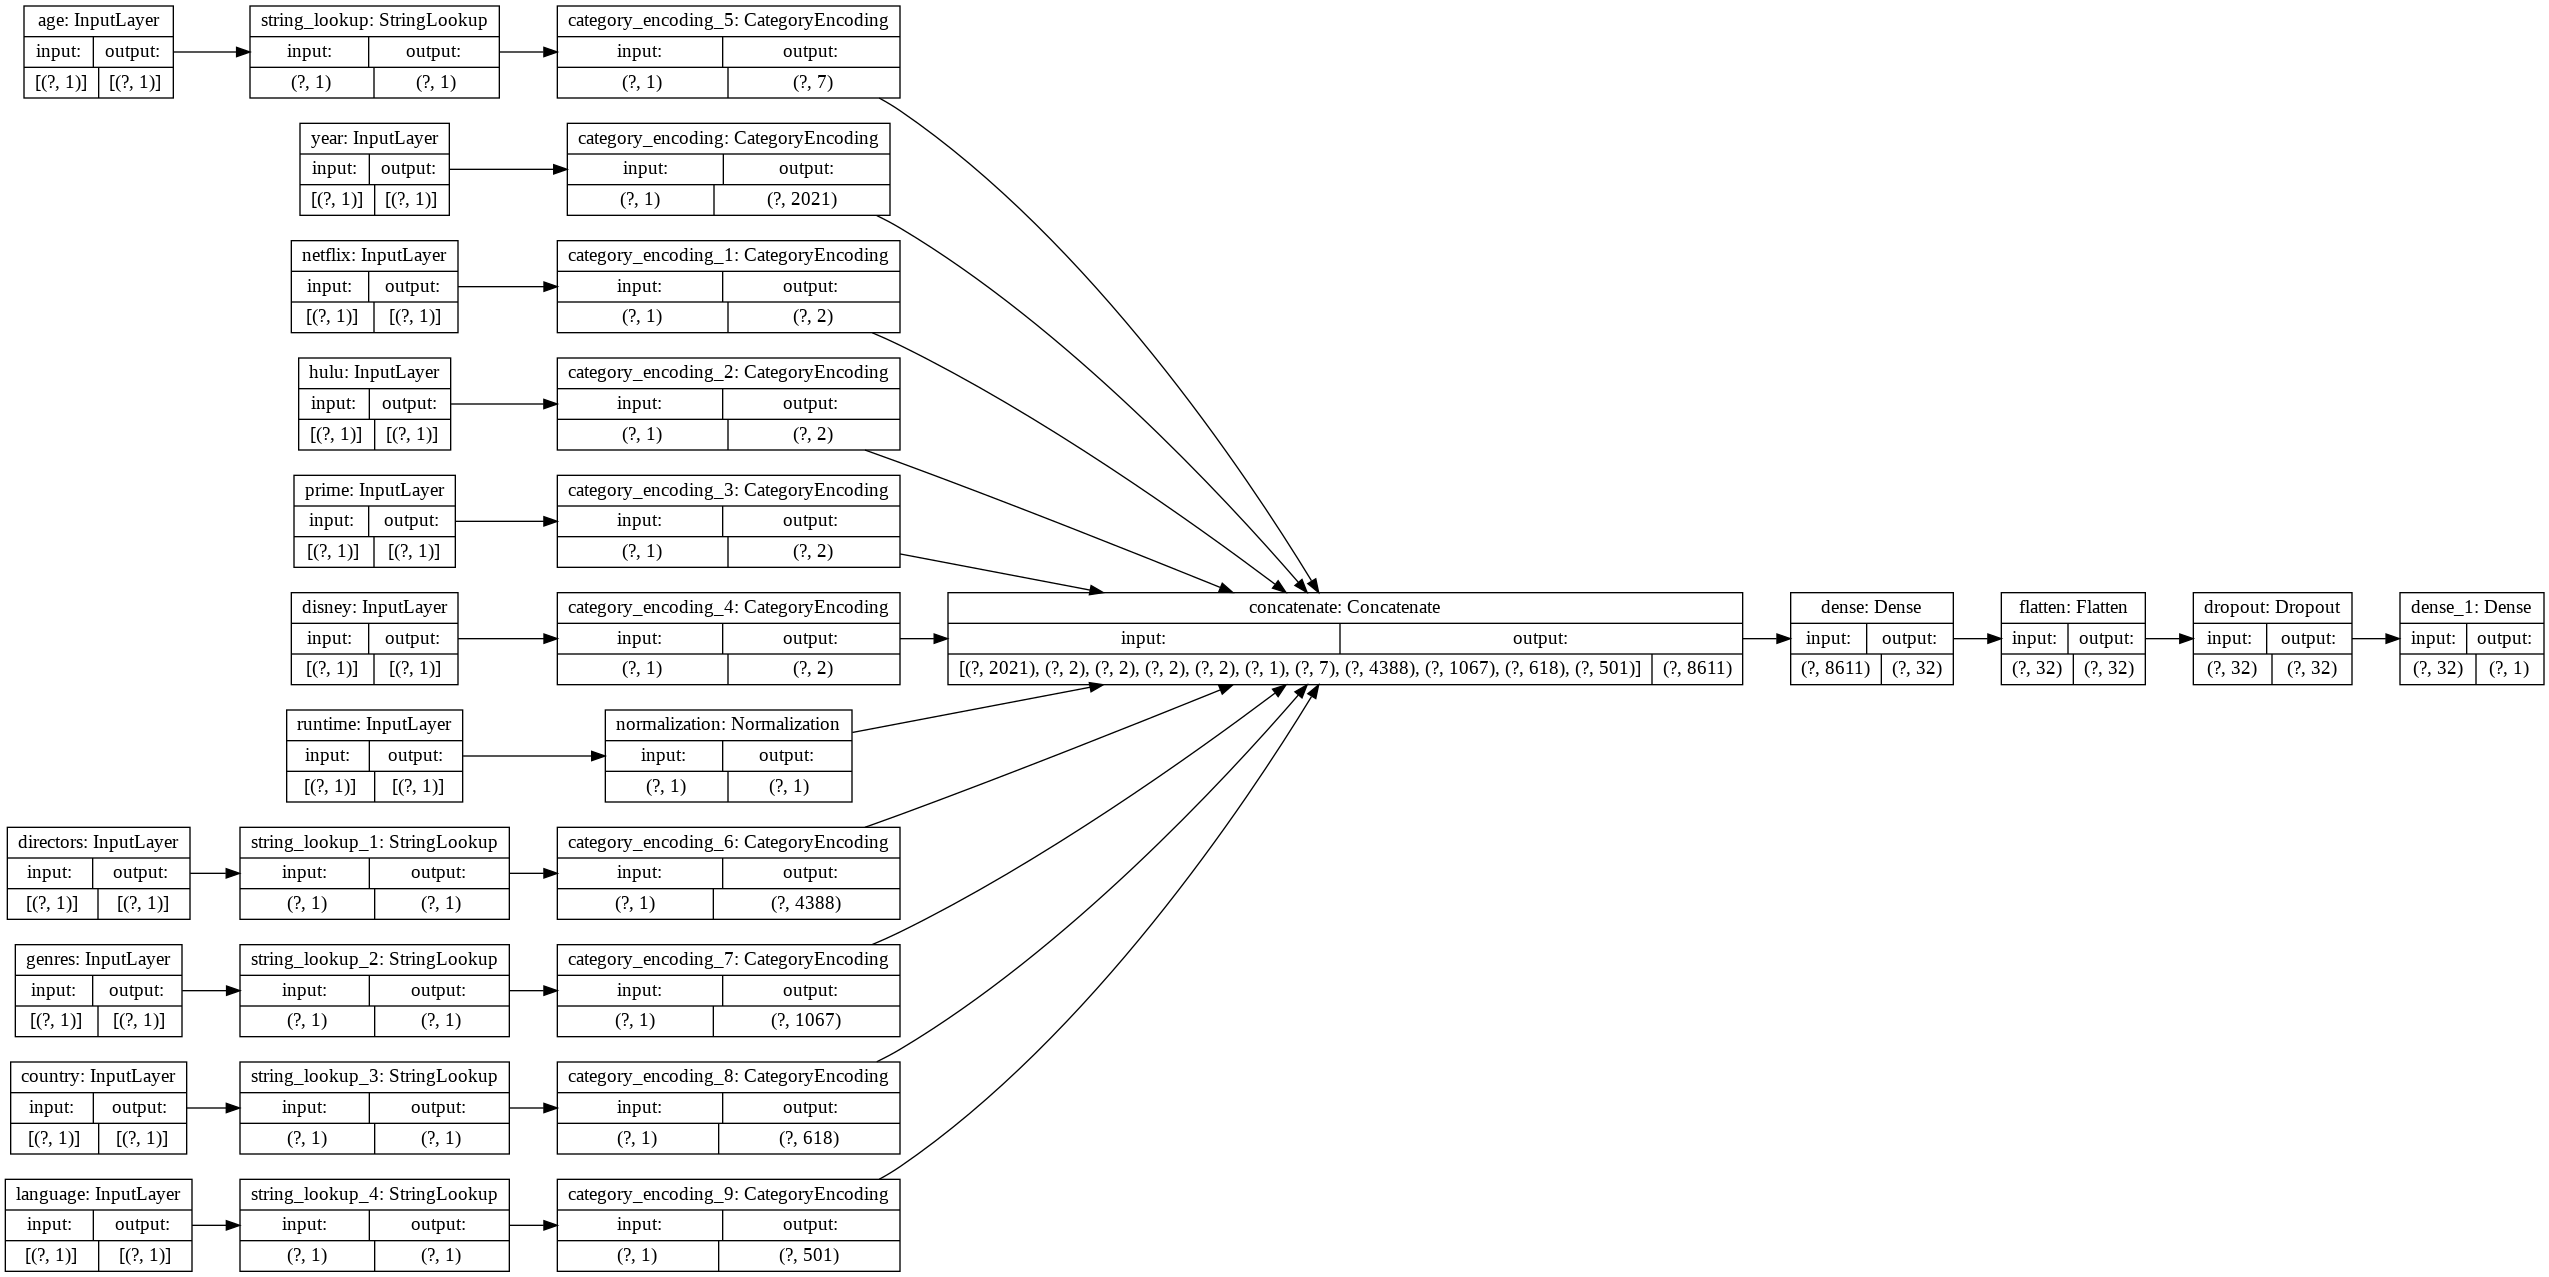

In [28]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [29]:
model.fit(treinoDs, epochs=10, validation_data=testeDs)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id', 'title'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


177/177 [==============================] - 1s 7ms/step - loss: 12.8377 - mse: 12.8377 - mae: 2.9999 - val_loss: 1.9705 - val_mse: 1.9705 - val_mae: 1.1550
Epoch 2/10
177/177 [==============================] - 1s 6ms/step - loss: 3.5134 - mse: 3.5134 - mae: 1.5011 - val_loss: 1.6793 - val_mse: 1.6793 - val_mae: 1.0631
Epoch 3/10
177/177 [==============================] - 1s 6ms/step - loss: 3.2768 - mse: 3.2768 - mae: 1.4560 - val_loss: 1.4983 - val_mse: 1.4983 - val_mae: 1.0027
Epoch 4/10
177/177 [==============================] - 1s 6ms/step - loss: 2.9932 - mse: 2.9932 - mae: 1.3896 - val_loss: 1.4459 - val_mse: 1.4459 - val_mae: 0.9870
Epoch 5/10
177/177 [==============================] - 1s 6ms/step - loss: 2.8472 - mse: 2.8472 - mae: 1.3388 - val_loss: 1.4565 - val_mse: 1.4565 - val_mae: 0.9885
Epoch 6/10
177/177 [==============================] - 1s 6ms/step - loss: 2.7253 - mse: 2.7253 - mae: 1.3191 - val_loss: 1.3287 - val_mse: 1.3287 - val_mae: 0.9396
Epoch 7/10
177/177 [=====

In [30]:
# Testando com o filme Inception
sampleRec = {
    "year": 2010,
    "age": "13+",
    "netflix": 1,
    "hulu": 0,
    "prime": 0,
    "disney": 0,
    "directors": "Christopher Nolan",
    "genres": "Action,Adventure,Sci-Fi,Thriller",
    "country": "United States,United Kingdom",
    "language": "English,Japanese,French",
    "runtime": 148.0
}


#Testando com o filme Furie 
sampleNotRec = {
    "year": 2019,
    "age": "18+",
    "netflix": 1,
    "hulu": 0,
    "prime": 0,
    "disney": 0,
    "directors": "David Ayer",
    "genres": "Action,Drama,War",
    "country": "United States,China,United Kingdom",
    "language": "English,German",
    "runtime": 134.0
}

In [31]:
input_dictRec = {name: tf.convert_to_tensor([value]) for name, value in sampleRec.items()}
predictionsRec = model.predict(input_dictRec)

In [38]:
print(
    "A nota predita para este filme é %.1f" % (predictionsRec[0][0])
)

A nota predita para este filme é 6.8


In [40]:
input_dictNotRec = {name: tf.convert_to_tensor([value]) for name, value in sampleNotRec.items()}
predictionsNotRec = model.predict(input_dictNotRec)

In [42]:
print(
    "A nota predita para este filme é %.1f" % (predictionsNotRec[0][0])
)

A nota predita para este filme é 6.4
